# 10. Filtering

In [1]:
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ip= input("Enter image file name: ")

Enter image file name: Images/scenary.png


In [3]:
img1= cv2.imread(ip)
img= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [4]:
def low_pass_filter(img):
    new_img= np.zeros((img.shape[0], img.shape[1], 3))
    
    filter_size= int(input("Enter filter size: "))
    filter_=  np.ones((filter_size, filter_size))
    mod= filter_size**2
    
    for i in range(filter_.shape[0]//2, new_img.shape[0]-filter_.shape[0]//2):
        for j in range(filter_.shape[1]//2, new_img.shape[1]-filter_.shape[1]//2):
            
            x1= i-filter_.shape[0]//2
            x2= x1+ filter_.shape[0]
            y1= j- filter_.shape[1]//2
            y2= y1+ filter_.shape[1]
            
            arr0= img[ x1:x2 , y1:y2, 0]
            arr1= img[ x1:x2 , y1:y2, 1 ]
            arr2= img[ x1:x2 , y1:y2, 2 ]
            
            new_img[i][j][0]= int(np.dot(np.ravel(arr0), np.ravel(filter_).T )//mod)
            new_img[i][j][1]= int(np.dot(np.ravel(arr1), np.ravel(filter_).T )//mod)
            new_img[i][j][2]= int(np.dot(np.ravel(arr2), np.ravel(filter_).T )//mod)
    return np.array(new_img, dtype= 'uint8')

In [5]:
def high_pass_filter(img):
    new_img= np.zeros((img.shape[0], img.shape[1], 3))
    
    filter_size= int(input("Enter filter size: "))
    filter_=  -1* np.ones((filter_size, filter_size))
    mod= filter_size**2
    filter_[filter_size//2][filter_size//2]= mod- 1
    
    
    for i in range(filter_.shape[0]//2, new_img.shape[0]-filter_.shape[0]//2):
        for j in range(filter_.shape[1]//2, new_img.shape[1]-filter_.shape[1]//2):
            
            x1= i-filter_.shape[0]//2
            x2= x1+ filter_.shape[0]
            y1= j- filter_.shape[1]//2
            y2= y1+ filter_.shape[1]
            
            arr0= img[ x1:x2 , y1:y2, 0]
            arr1= img[ x1:x2 , y1:y2, 1 ]
            arr2= img[ x1:x2 , y1:y2, 2 ]
            
            new_img[i][j][0]= int(np.dot(np.ravel(arr0), np.ravel(filter_).T )//mod)
            new_img[i][j][1]= int(np.dot(np.ravel(arr1), np.ravel(filter_).T )//mod)
            new_img[i][j][2]= int(np.dot(np.ravel(arr2), np.ravel(filter_).T )//mod)
    
            if new_img[i][j][0]<0:
                new_img[i][j][0]= 0
            elif new_img[i][j][0]> 255:
                new_img[i][j][0]= 255
            
            if new_img[i][j][1]<0:
                new_img[i][j][1]= 0
            elif new_img[i][j][1]> 255:
                new_img[i][j][1]= 255
            
            if new_img[i][j][2]<0:
                new_img[i][j][2]= 0
            elif new_img[i][j][2]> 255:
                new_img[i][j][2]= 255
                
    return np.array(new_img, dtype= 'uint8')

In [6]:
def high_boost_filter(img):
    new_img= np.zeros((img.shape[0], img.shape[1], 3))
    
    filter_size= int(input("Enter filter size: "))
    const= float(input("Enter constant: "))
    filter_=  -1*np.ones((filter_size, filter_size))
    mod= filter_size**2
    filter_[filter_size//2][filter_size//2]= (mod-1)*const
    
    
    for i in range(filter_.shape[0]//2, new_img.shape[0]-filter_.shape[0]//2):
        for j in range(filter_.shape[1]//2, new_img.shape[1]-filter_.shape[1]//2):
            
            x1= i-filter_.shape[0]//2
            x2= x1+ filter_.shape[0]
            y1= j- filter_.shape[1]//2
            y2= y1+ filter_.shape[1]
            
            arr0= img[ x1:x2 , y1:y2, 0]
            arr1= img[ x1:x2 , y1:y2, 1 ]
            arr2= img[ x1:x2 , y1:y2, 2 ]
            
            new_img[i][j][0]= np.dot(np.ravel(arr0), np.ravel(filter_).T )/mod
            new_img[i][j][1]= np.dot(np.ravel(arr1), np.ravel(filter_).T )/mod
            new_img[i][j][2]= np.dot(np.ravel(arr2), np.ravel(filter_).T )/mod
    
            if new_img[i][j][0]<0:
                new_img[i][j][0]= 0
            elif new_img[i][j][0]> 255:
                new_img[i][j][0]= 255
            
            if new_img[i][j][1]<0:
                new_img[i][j][1]= 0
            elif new_img[i][j][1]> 255:
                new_img[i][j][1]= 255
            
            if new_img[i][j][2]<0:
                new_img[i][j][2]= 0
            elif new_img[i][j][2]> 255:
                new_img[i][j][2]= 255
                
    return np.array(new_img, dtype= 'uint8')

In [7]:
def normal_val(x, y, sig):
    val= ((x**2)+ (y**2))/2.0
    val= val/(sig**2)
    fin_val= np.exp(-val)
    return fin_val

def gaussian_filter(img):
    n= int(input("Enter filter size, n: "))
    sig= np.sqrt(int(input("Enter variance, sigma^2: ")))
    
    filter_= [np.array([ 0.0 for i in range(-(n//2), n//2 +1)]) for j in range(-(n//2), n//2 +1)]
    
    c= 1/normal_val(n//2, n//2, sig)
    for i in range(-(n//2), n//2 +1):
        for j in range(-(n//2), n//2 +1):
            filter_[i+ n//2][j+ n//2]= round(normal_val(i, j, sig)*c, 0)
    filter_= np.array(filter_)
    
    print(filter_)
    
    new_img= np.zeros((img.shape[0], img.shape[1], 3))
    mod= np.sum(filter_)
    for i in range(filter_.shape[0]//2, new_img.shape[0]-filter_.shape[0]//2):
        for j in range(filter_.shape[1]//2, new_img.shape[1]-filter_.shape[1]//2):

            x1= i-filter_.shape[0]//2
            x2= x1+ filter_.shape[0]
            y1= j- filter_.shape[1]//2
            y2= y1+ filter_.shape[1]

            arr0= img[ x1:x2 , y1:y2, 0]
            arr1= img[ x1:x2 , y1:y2, 1 ]
            arr2= img[ x1:x2 , y1:y2, 2 ]

            new_img[i][j][0]= int(np.dot(np.ravel(arr0), np.ravel(filter_).T )//mod)
            new_img[i][j][1]= int(np.dot(np.ravel(arr1), np.ravel(filter_).T )//mod)
            new_img[i][j][2]= int(np.dot(np.ravel(arr2), np.ravel(filter_).T )//mod)
    
    return np.array(new_img, dtype= 'uint8')
            

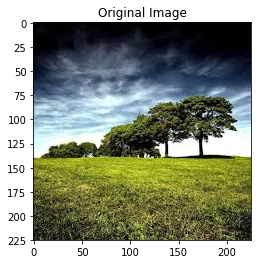

In [9]:
plt.title('Original Image')
plt.imshow(img)
plt.show()

Enter filter size: 3


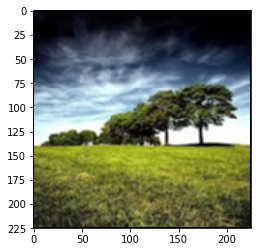

In [12]:
new_img_low= low_pass_filter(img)
# plt.figure(figsize= (10, 10))
plt.imshow(new_img_low)
plt.show()

Enter filter size: 3


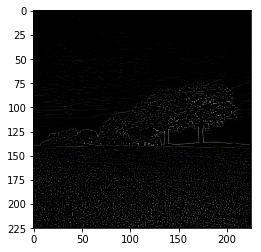

In [13]:
new_img_high= high_pass_filter(img)
# plt.figure(figsize= (10, 10))
plt.imshow(new_img_high)
plt.show()

Enter filter size: 3
Enter constant: 2


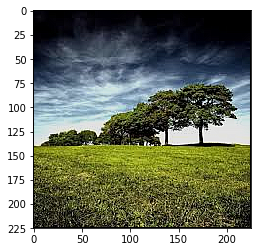

In [14]:
new_img_boost= high_boost_filter(img)
# plt.figure(figsize= (10, 10))
plt.imshow(new_img_boost)
plt.show()

Enter filter size, n: 7
Enter variance, sigma^2: 1
[[1.000e+00 1.200e+01 5.500e+01 9.000e+01 5.500e+01 1.200e+01 1.000e+00]
 [1.200e+01 1.480e+02 6.650e+02 1.097e+03 6.650e+02 1.480e+02 1.200e+01]
 [5.500e+01 6.650e+02 2.981e+03 4.915e+03 2.981e+03 6.650e+02 5.500e+01]
 [9.000e+01 1.097e+03 4.915e+03 8.103e+03 4.915e+03 1.097e+03 9.000e+01]
 [5.500e+01 6.650e+02 2.981e+03 4.915e+03 2.981e+03 6.650e+02 5.500e+01]
 [1.200e+01 1.480e+02 6.650e+02 1.097e+03 6.650e+02 1.480e+02 1.200e+01]
 [1.000e+00 1.200e+01 5.500e+01 9.000e+01 5.500e+01 1.200e+01 1.000e+00]]


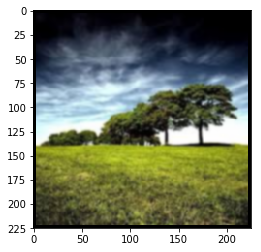

In [16]:
img_gaussian= gaussian_filter(img)
# plt.figure(figsize= (10, 10))
plt.imshow(img_gaussian)
plt.show()